# My abstract

In [64]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import scipy.stats as stats

### Functions and constants

In [65]:
def get_percentiles(x):
    y_percentiles = np.arange(101)
    x_percentiles = [np.percentile(x,y_percentiles[i]) for i in range(len(y_percentiles))]
    # an array is created bc of [] using the values determined by the loop inside the []
    return x_percentiles,y_percentiles

def rsquared(x, y):
    slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
    return r_value**2

### Data

In [66]:
filepath = r'C:\Users\Siobhan\Documents\University\Honours 2022\Coursework\medaes\marshy-creek-data.csv'
data = pd.read_csv(filepath)

gr_data = data.groupby('Site').mean()

gr_data_whole = data.groupby('Site')  

#### Data Slicing

In [67]:
ave_depth = data.iloc[:108, 4]
dist_from_est = data.iloc[:108, 1]

iron_conc = data.iloc[:108, 14]
org_c = data.iloc[:108, 8]
sodium_conc = data.iloc[:108, 24]
n_conc = data.iloc[:108, 9]
net_acidity = data['Net Acidity (mol H+/t)']

gr_orgc = gr_data.iloc[:108, 7]
gr_avedepth = gr_data.iloc[:108, 3]
gr_dist_f_est = gr_data.iloc[:108, 0]
gr_sodium = gr_data.iloc[:108, 22]

gr_sulfur = gr_data.iloc[:108, 24]
gr_nitr = gr_data.iloc[:108, 9]

#Remove outliers of Net Acidity using z scores
zofNetAcidity = np.abs(stats.zscore(net_acidity)) 
z = 0.6
no_outliers_NetAcidity = net_acidity[(zofNetAcidity<z)]
no_outliers_orgC = org_c.iloc[np.where(zofNetAcidity<z)]
no_outliers_distFromEst = dist_from_est.iloc[np.where(zofNetAcidity<z)]

x_percentiles,y_percentiles = get_percentiles(no_outliers_orgC)

### Plots

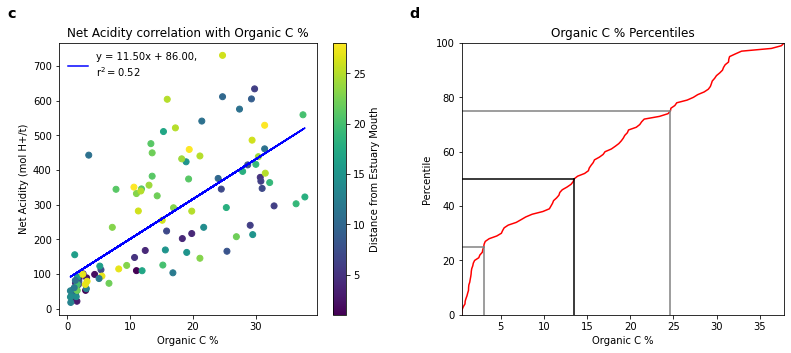

In [68]:
#Plotting net acidity against organic c
plt.rcParams['figure.figsize'] = [13,5]
plt.subplot(121)

plt.scatter(no_outliers_orgC, no_outliers_NetAcidity, c=no_outliers_distFromEst)
plt.xlabel('Organic C %')
plt.ylabel('Net Acidity (mol H+/t)')
plt.colorbar(label= 'Distance from Estuary Mouth')
plt.title('Net Acidity correlation with Organic C %') 
plt.figtext(0.07, 0.95, 'c', weight = 'semibold', size = 'x-large')

M, C, R_value, p_value, std_err = stats.linregress(no_outliers_orgC, no_outliers_NetAcidity)
m, b = np.polyfit(no_outliers_orgC, no_outliers_NetAcidity, 1)

plt.plot(no_outliers_orgC, m*no_outliers_orgC + b, c='b', label='y = %.2fx + %.2f,\nr$^2=%.2f$'%(m, b, R_value**2))
plt.legend(frameon=False)

#Percentiles
plt.subplot(122)
plt.plot(x_percentiles,y_percentiles,c='r') #the red line
plt.plot([x_percentiles[0],x_percentiles[25]],[25,25],c='grey') #the quartile lines 
plt.plot([x_percentiles[0],x_percentiles[50]],[50,50],c='k')
plt.plot([x_percentiles[0],x_percentiles[75]],[75,75],c='grey')
plt.plot([x_percentiles[25],x_percentiles[25]],[0,25],c='grey')
plt.plot([x_percentiles[50],x_percentiles[50]],[0,50],c='k')
plt.plot([x_percentiles[75],x_percentiles[75]],[0,75],c='grey')
#plt.xscale('log')
plt.xlabel('Organic C %')
plt.ylabel('Percentile')
plt.ylim(0,100)
plt.xlim(np.min(no_outliers_orgC),np.max(no_outliers_orgC))
plt.title('Organic C % Percentiles')
plt.figtext(0.5, 0.95, 'd', weight = 'semibold', size = 'x-large')

plt.subplots_adjust(wspace=0.25)

plt.savefig('NetAcidityandOrganicC.png', dpi=300, bbox_inches='tight')

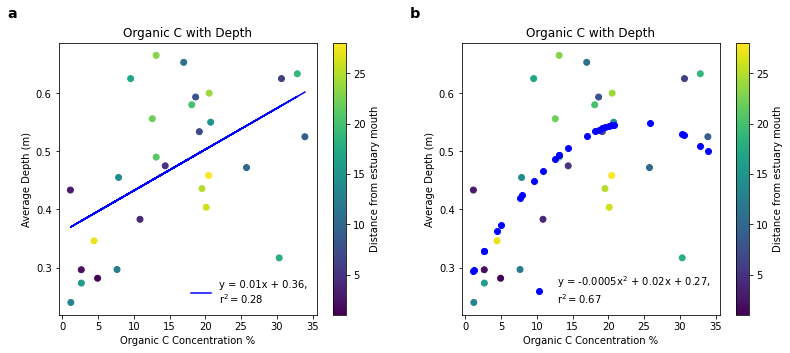

In [69]:
plt.rcParams['figure.figsize'] = [13,5]
plt.subplot(121)
#Fitting organic C to a linear correlation 
plt.scatter(gr_orgc, gr_avedepth, c=gr_dist_f_est)
plt.xlabel('Organic C Concentration %')
plt.ylabel('Average Depth (m)')
plt.colorbar(label= 'Distance from estuary mouth')
plt.title('Organic C with Depth') 
plt.figtext(0.07, 0.95, 'a', weight = 'semibold', size = 'x-large')


m, c, r_value, p_value, std_err = stats.linregress(gr_orgc, gr_avedepth)

m, b = np.polyfit(gr_orgc, gr_avedepth, 1)
plt.plot(gr_orgc, m*gr_orgc + b, c='b', label='y = %.2fx + %.2f,\nr$^2=%.2f$'%(m, b, r_value**2))
plt.legend(frameon=False)

#Fitting organic C to a second order polynomial
plt.subplot(122)
plt.scatter(gr_orgc, gr_avedepth, c=gr_dist_f_est)
plt.xlabel('Organic C Concentration %')
plt.ylabel('Average Depth (m)')
plt.colorbar(label= 'Distance from estuary mouth')
plt.title('Organic C with Depth') 
plt.figtext(0.5, 0.95, 'b', weight = 'semibold', size = 'x-large')


coef= np.polyfit(gr_orgc, gr_avedepth, 2)
newPolynomial2 = coef[0]*(gr_orgc**2) + coef[1]*gr_orgc + coef[2]
orgc_quad_r2 = rsquared(gr_orgc, newPolynomial2)

plt.scatter(gr_orgc, newPolynomial2, c='b', label='y = %.4fx$^2$ + %.2fx + %.2f,\nr$^2=%.2f$'%(coef[0], coef[1], coef[2], orgc_quad_r2))
plt.legend(frameon=False)

plt.subplots_adjust(wspace=0.25)

plt.savefig('OrganicCwithDepth.png', dpi=300, bbox_inches='tight')

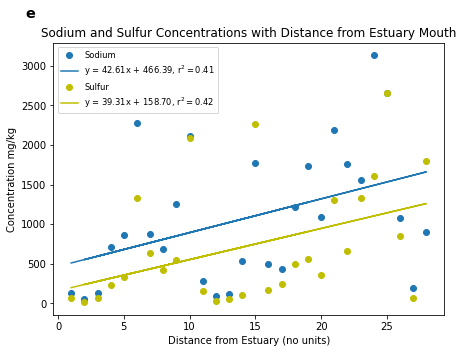

In [70]:
#Sodium and sulfur vs distance from esturary 

m1, c, r_value1, p_value, std_err = stats.linregress(gr_dist_f_est, gr_sodium)
plt.rcParams['figure.figsize'] = [7,5]
#Sodium
plt.scatter(gr_dist_f_est, gr_sodium, label = 'Sodium')
plt.xlabel('Distance from Estuary (no units)')
plt.ylabel('Concentration mg/kg')
#Line of best fit and r squared 
m, b = np.polyfit(gr_dist_f_est, gr_sodium, 1)
m1, c1, r_value, p_value, std_err = stats.linregress(gr_dist_f_est, gr_sodium)
plt.plot(gr_dist_f_est, m*gr_dist_f_est + b, label='y = %.2fx + %.2f, r$^2=%.2f$'%(m, b, r_value))
plt.legend(frameon=False)

#Sulfur
plt.scatter(gr_dist_f_est, gr_sulfur, c='y', label = 'Sulfur')
#Line of best fit and r squared 
m2, b2 = np.polyfit(gr_dist_f_est, gr_sulfur, 1)
m, c, r_value1, p_value, std_err = stats.linregress(gr_dist_f_est, gr_sulfur)
plt.plot(gr_dist_f_est, m2*gr_dist_f_est + b2, c='y', label='y = %.2fx + %.2f, r$^2=%.2f$'%(m2, b2, r_value1))
plt.legend(loc = 'upper left', frameon=True, fontsize = 'small')

plt.title('Sodium and Sulfur Concentrations with Distance from Estuary Mouth') 
plt.figtext(0.07, 0.95, 'e', weight = 'semibold', size = 'x-large')

plt.savefig('SodiumSulfurVDistance.png', dpi=300, bbox_inches='tight')